In [7]:
print(len(test_dataset))

120


cpu


/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/pans/miniconda3/envs/miw/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 3, 0, 2, 1, 3, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
0
[[20  0  0 10]
 [ 9 11  1  3]
 [ 0  0 36  2]
 [ 0  0  3 25]]


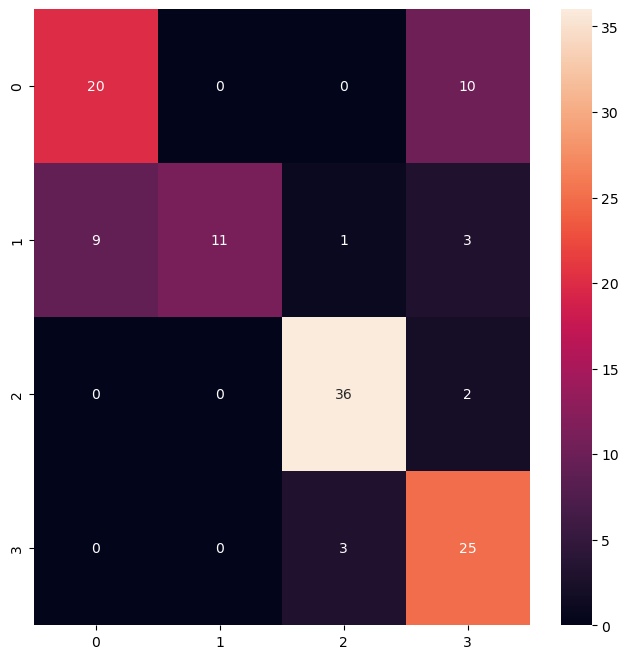

In [6]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models import resnet18
import random

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print(device)

num_classes = 4
image_size = 224
batch_size = 16
dropout = 0.5

# Resnet model
model = resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)
model = model.to(device)

model.load_state_dict(torch.load('../models/resnet_weigth_best.pth', map_location=torch.device('cpu')))
model.eval()


# # model = CNNModel(num_classes, image_size, dropout)
# model = torch.load('./Team_Complate_Model_2.pth')
# model = model.to(device)
# # model.load_state_dict(torch.load('./Team_Weith_Model_1.pth'))
# model.eval()


# Define the transformations for test data before entering the neural network
transform_test = transforms.Compose([
    transforms.Resize((image_size, image_size)),                     # Resize images to 224x224 pixels
    transforms.ToTensor(),                                           # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the images
])

# Load dataset path
test_dir = "../data/Test"

# Load the test dataset
test_dataset = ImageFolder(test_dir, transform=transform_test)

test_dataset = list(test_dataset)

# test_dataset = random.sample(test_dataset, k=100) # for normalisation purpose

# Create DataLoader for managing the test data batches
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# def test(model, criterion, test_loader, device):
#     model.eval()
#     correct = 0
#     total = 0
#     running_loss = 0.0

#     with torch.no_grad():
#         for inputs, labels in test_loader:
#             inputs = inputs.to(device)
#             labels = labels.to(device)

#             outputs = model(inputs)
#             loss = criterion(outputs, labels)

#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#             running_loss += loss.item()

#     accuracy = 100.0 * correct / total
#     return running_loss / len(test_loader), accuracy

# criterion = nn.CrossEntropyLoss()

# test_loss, test_accuracy = test(model, criterion, test_loader, device)
# print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

y_pred = []
y_true = []
quantity = 0
# Iterate over test data
for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    output = model(inputs)  # Feed Network
    output = torch.argmax(torch.exp(output), dim=1).cpu().numpy()

        
    y_pred.extend(output)  # Save Prediction
    labels = labels.cpu().numpy()
    y_true.extend(labels)  # Save Truth

# Class labels
classes = ('0', '1', '2', '3') # with cat 1 is good apple
# test_dataset.class_to_idx
# idx2class = {v: k for k, v in test_dataset.class_to_idx.items()}

print(y_pred)
print(y_true)
print(quantity)


# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred) # y-axis = y_true (labels) and x-axis = y_pred (model predictions)
print(cf_matrix)

# confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename(columns=idx2class, index=idx2class)
confusion_matrix_df = pd.DataFrame(cf_matrix, columns=classes, index=classes)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix_df, annot=True, ax=ax)
plt.show()


In [3]:
sample32 = random.sample(y_pred, k=50)

# print(sample32)
print(len(sample32))

Blotch_Apple = 0
Normal_Apple= 0
Rot_Apple = 0
Scab_Apple= 0
amount_bad = 0

for i in sample32:
    if i == 1:  # good apple
        Normal_Apple += 1
    elif i == 0:
        Blotch_Apple += 1
        amount_bad += 1
    elif i == 2:
        Rot_Apple += 1
        amount_bad += 1      
    else:
        Scab_Apple += 1
        amount_bad += 1 
print(Normal_Apple)   
print(Blotch_Apple)   
print(Rot_Apple)   
print(Scab_Apple)  
print(amount_bad)   
print(Normal_Apple + amount_bad)

outcome_dict= {'normal': Normal_Apple, 'blotched': Blotch_Apple, 'rotten': Rot_Apple, 'scab': Scab_Apple}
print(outcome_dict)

tot_num_outcome_dict = len(sample32)
print(tot_num_outcome_dict)

perc_bad_apples = (amount_bad/len(sample32))*100
print(f'% slechte appels: {perc_bad_apples}')

if perc_bad_apples <= 0.4:
    print('Klasse 1: naar supermarkt')
elif perc_bad_apples > 0.4 and perc_bad_apples < 6.5:
    print('Klasse 2: naar appelmoesfabriek')
elif perc_bad_apples >= 6.5 and perc_bad_apples < 15:
    print('Klasse 3: naar appelstroopfabriek')
else:
    print('Klasse 4: naar de varkens ermee!')

50
3
10
16
21
47
50
{'normal': 3, 'blotched': 10, 'rotten': 16, 'scab': 21}
50
% slechte appels: 94.0
Klasse 4: naar de varkens ermee!


In [15]:
# !pip install -U sentence-transformers

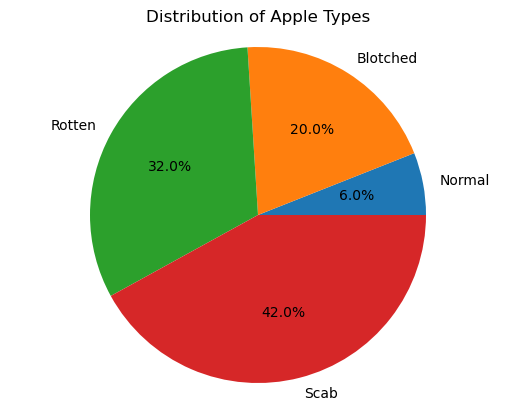

In [10]:
# Pie chart visualization for the types of apples
labels = ['Normal', 'Blotched', 'Rotten', 'Scab']
sizes = [Normal_Apple, Blotch_Apple, Rot_Apple, Scab_Apple]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio = drawn as a circle.
plt.title('Distribution of Apple Types')
plt.show()


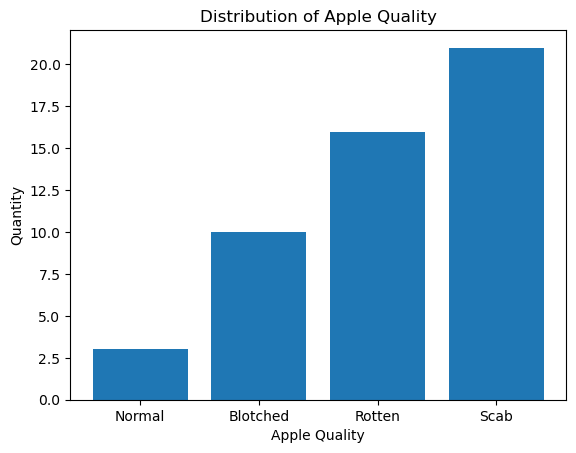

In [13]:
quantity=sizes

# Plotting the bar plot
plt.bar(labels, quantity)

# Adding labels and title
plt.xlabel('Apple Quality')
plt.ylabel('Quantity')
plt.title('Distribution of Apple Quality');


In [4]:
from sentence_transformers import SentenceTransformer
from scipy.spatial.distance import cosine

# Load the pre-trained sentence transformer model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

# Define a list of sample questions
questions = [
    "Can you tell me the total number of apples in the batch?",
    "What is the percentage of bad apples?",
    "How many bad apples are there in an approved batch?",
    "How many apples are categorized as blotch?",
    "What is the proportion of rotten apples?",
    "Can we use this apple batch to make apple mousse?",
    "Are there enough healthy apples to make apple sauce?",
    "Can we use this batch for the supermarket if the acceptance quality is increased by 1 percentage for the klasse 1?",
    "Does the quality of the batch increase when the batch size is increased?",
    "What’s the average ratio between the healthy and unhealthy apples for different sample sizes?"
]

# Calculate sentence embeddings for the questions
question_embeddings = model.encode(questions)

# Define the answers corresponding to each question
answers = [
    f"The total number of apples in the batch is {len(sample32)}.",
    f"The percentage of bad apples is {perc_bad_apples:.2f}%.",
    f"The number of bad apples in an approved batch is {amount_bad}.",
    f"The number of apples categorized as blotch is {Blotch_Apple}.",
    f"The proportion of rotten apples is {Rot_Apple / tot_num_outcome_dict:.2f}.",
    "Yes, we can use this apple batch to make apple mousse.",
    "To make apple sauce, we need to evaluate the number of healthy apples based on the desired quantity.",
    "If the acceptance quality is increased by 1 percentage for klasse 1, we can use this batch for the supermarket.",
    "The quality of the batch may or may not increase when the batch size is increased. It depends on various factors.",
    "The average ratio between healthy and unhealthy apples can be calculated based on different sample sizes."
]

# Define a function to get the most similar question and its corresponding answer
def get_answer(user_query):
    query_embedding = model.encode([user_query]).flatten()  # Flatten the query_embedding
    similarities = [1 - cosine(query_embedding, q_emb) for q_emb in question_embeddings]
    most_similar_idx = similarities.index(max(similarities))
    return answers[most_similar_idx]

# Chat bot loop
while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        print("Chat bot: Goodbye!")
        break
    else:
        response = get_answer(user_input)
        print("Chat bot:", response)

User:  percentage bad apples


Chat bot: The percentage of bad apples is 94.00%.


User:  fit for apple mouse


Chat bot: Yes, we can use this apple batch to make apple mousse.


User:  exit


Chat bot: Goodbye!
